In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans

# Clustering
- Before working with a real dataset, we're going to see how clustering works on 2 different datasets.
- In the first dataset, we're going to assume that we already know how many clusters there should be and therefore use K-means clustering.
- In the second dataset, we're going to relax this assumption and say that we don't know how many there should be. When doing this, we need to look at the dendrograms and then use Hierarchical clustering from there.

## Example 1: If you know how many clusters...
Within this example, we're going to view the given dataset and determine how many clusters there should be. Because this is only a two-dimensional dataset, the number of appropriate clusters should be quite obvious. 

However, when working with 3 or more dimensions, these clusters become harder and harder to visualize since we're unable to view them in a single graph. When this is the case, we'll use Hierachical Clustering but we'll do that in Example 2.

<b><u>For now, let's remember that when using K-means, we already know how many clusters there should be.</b></u>

In [2]:
# Load in the basic1_preprocessed dataset.
data = pd.read_csv("./data/basic5_preprocessed.csv")

In [3]:
data.head()

,x,y
0,472.431845,133.637138
1,392.213650,248.151058
2,185.231588,128.911761
3,175.553180,234.373421
4,199.902134,373.492265


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       4000 non-null   float64
 1   y       4000 non-null   float64
dtypes: float64(2)
memory usage: 62.6 KB


In [5]:
data.shape

(4000, 2)

<Axes: xlabel='x', ylabel='y'>

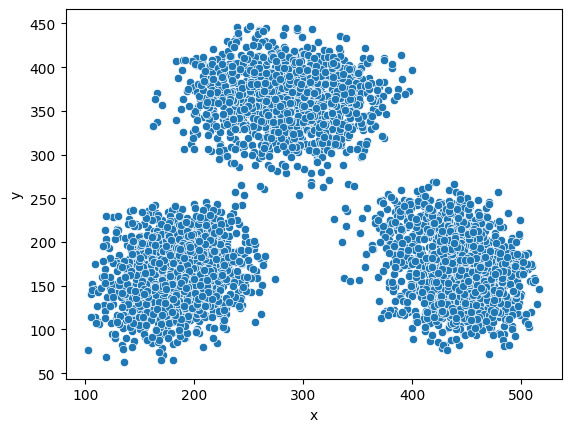

In [6]:
# Using seaborn, plot both the x and the y coordinates.
sns.scatterplot(data=data, x="x", y="y")

In [7]:
# Using the plot above, what is the appropriate amount of clusters to use?
# three clusters

In [7]:
# Use K-Means clustering in order to put these observations in their appropriate clusters.
# Use a random_state of 42.
#X = data.drop("y", axis=1)
X = data
Y = data["y"]

In [8]:
Kmean = KMeans(n_clusters=3)
Kmean.fit(X)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [9]:
# View the cluster centers.
Kmean.cluster_centers_

array([[285.57826503, 362.63088626],
       [441.54750631, 169.55272288],
       [184.79486459, 164.77097312]])

In [11]:
# think this shows which cluster each observation belongs to.
Kmean.labels_

array([1, 1, 2, ..., 2, 0, 0], dtype=int32)

In [12]:
len(Kmean.labels_)

4000

In [13]:
# With you pre-existing dataframe, add another column called "predicted_cluster_kmeans" where this is the assigned cluster.
#data["predicted_kmeans_cluster"] =
data['predicted_kmeans_cluster'] = Kmean.labels_.tolist()


In [14]:
data.head()

,x,y,predicted_kmeans_cluster
0,472.431845,133.637138,1
1,392.213650,248.151058,1
2,185.231588,128.911761,2
3,175.553180,234.373421,2
4,199.902134,373.492265,0


In [15]:
# Using Seaborn, plot again the dataset but make each of the different clusters a different color
# Ex: Observations in Cluster 1 are red, observations in Cluster 2 are blue, etc.

# Did K-Means do a good job in separating the clusters?
# yes

<Axes: xlabel='x', ylabel='y'>

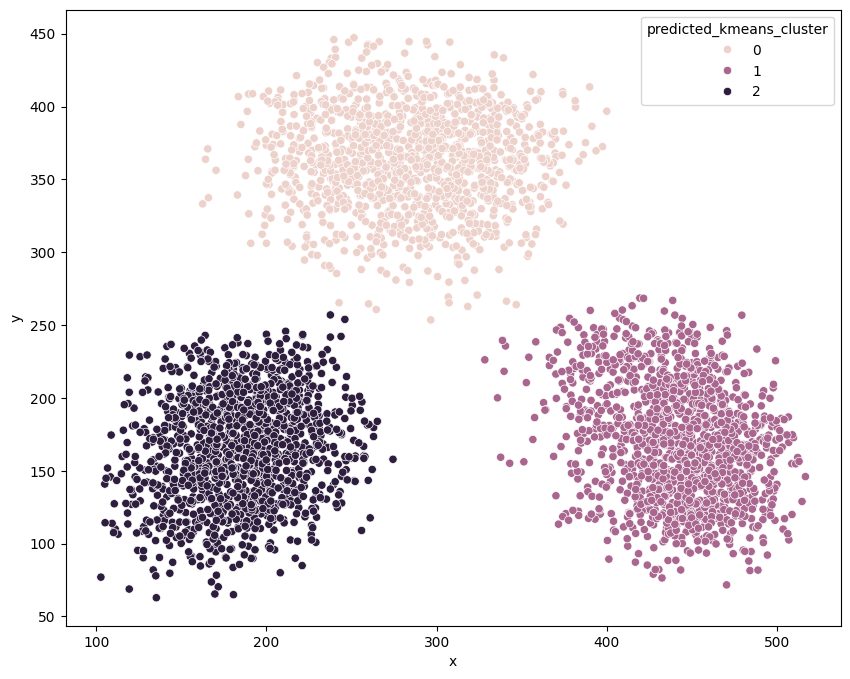

In [16]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x="x", y="y", hue="predicted_kmeans_cluster")

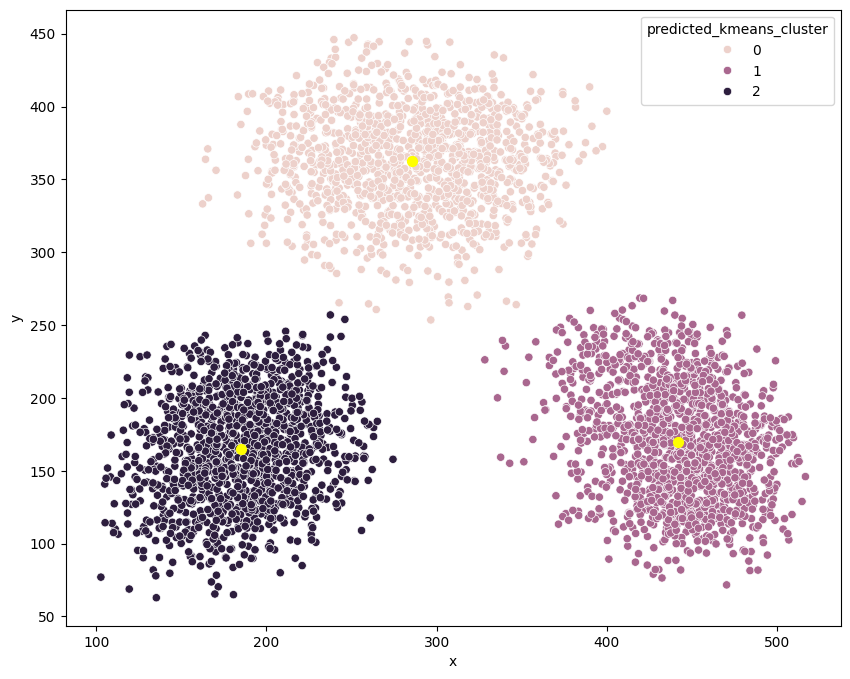

In [23]:
# label centroids
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x="x", y="y", hue="predicted_kmeans_cluster")
plt.scatter(Kmean.cluster_centers_[:,0], Kmean.cluster_centers_[:,1], s=50, c='yellow', label = 'Centroids')

In [ ]:
# Within K-means, re-plot the scatter plot but this time, also include the cluster centroids.

## Example 2: If you don't know how many clusters...

Now, let's assume that we don't know how many clusters there should be and instead, want to do a bottom-up approach using Hierarchical Clustering. In practice, this is typically how datasets are particularly since it's difficult to visualize clusters with 3+ dimensions. To do so, we first need to plot the dendrogram, choose where to make the "cut" within the dendrogram, and then cluster using Hierarchical Clustering.

In [32]:
# Load in the dataset.
data_2 = pd.read_csv("./data/supernova_preprocessed.csv")

In [33]:
data_2.head()

,x,y
0,202.207191,333.390000
1,214.424501,374.531029
2,476.317977,255.623373
3,237.659471,148.173931
4,201.959301,355.790748


In [34]:
data_2.shape

(10714, 2)

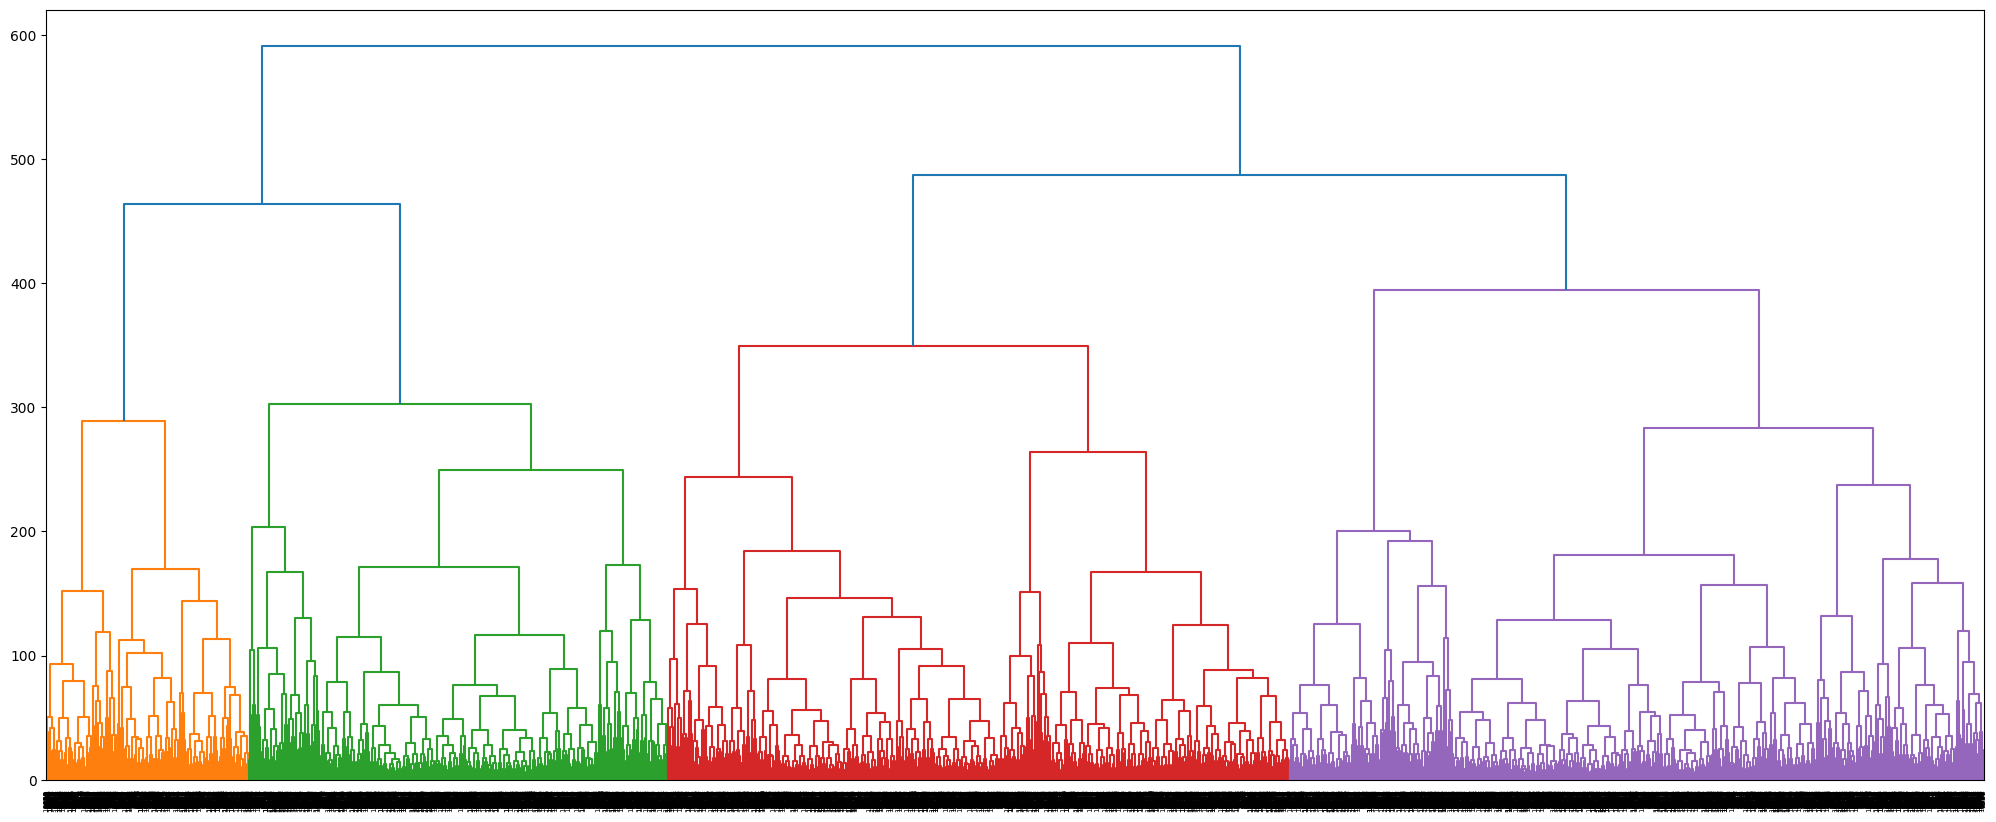

In [35]:
# Now, let's imagine that we initially don't know how many clusters there should be
# This could happen when we have 3+ different features and typically, it's hard to know beforehand.
# Use scipy's dendrogram method to plot.

import scipy
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

clusters = hierarchy.linkage(data_2[["x", "y"]], method="complete")
fig = plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(clusters)


In [ ]:
# Using the dendrogram, how many clusters do you believe that we should use?
# perhaps 4, but maybe 8

In [31]:
# Using this amount of clusters, use Scikit Learn's algorithm to get your predictions.
from sklearn.cluster import AgglomerativeClustering

hierarchical_clustering = AgglomerativeClustering(
    n_clusters=4, 
)

In [37]:
X2 = data_2
Y2 = data_2["y"]

In [38]:
hierarchical_clusters = hierarchical_clustering.fit_predict(X2)
hierarchical_clusters

array([3, 3, 0, ..., 0, 0, 2])

In [39]:
data_2['predicted_hier_cluster'] = hierarchical_clusters.tolist()

In [40]:
data_2.head()

,x,y,predicted_hier_cluster
0,202.207191,333.390000,3
1,214.424501,374.531029,3
2,476.317977,255.623373,0
3,237.659471,148.173931,2
4,201.959301,355.790748,3


<Axes: xlabel='x', ylabel='y'>

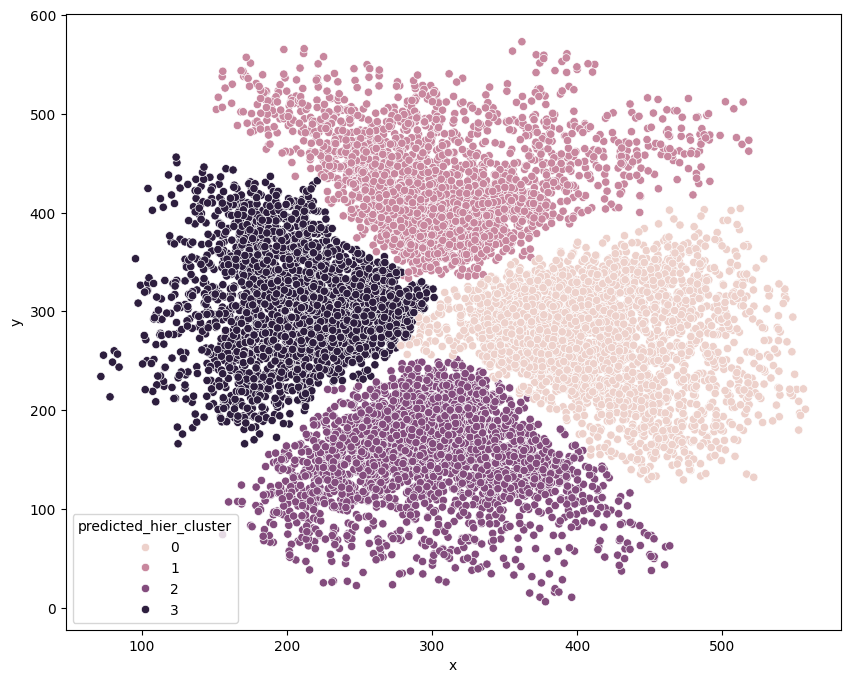

In [42]:
# Plot these predictions using Seaborn and separated by the predicted cluster.

plt.figure(figsize=(10, 8))
sns.scatterplot(data=data_2, x="x", y="y", hue="predicted_hier_cluster")

In [ ]:
# Did Hierarchical Clustering do well? Why or why not?
# yes it did, the data is well separated and the dendrogram plot guided the number of
# clusters to select